In [5]:
import numpy as np

"""!git clone https://github.com/FabriDeCastelli/HLT-News-Category.git
! pip install keras-tuner

import os
os.chdir("/content/HLT-News-Category/src/test")"""

'!git clone https://github.com/FabriDeCastelli/HLT-News-Category.git\n! pip install keras-tuner\n\nimport os\nos.chdir("/content/HLT-News-Category/src/test")'

In [1]:
import warnings
import sys
import os


warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))
sys.path.append(parent_dir)

#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [1]:
from src.main.models.bidirLSMT import BidirectionalLSTM
from src.main.pipeline.functions import clean_text, remove_contractions, stop_words_removal, tokenize
from src.main.utilities.utils import get_dataset, load_pretrained_embeddings, split_train_val_test, embedding_matrix_statistics
import keras as K
from config.config import TENSORBOARD_LOGS
import os


import warnings
warnings.filterwarnings("ignore")

In [2]:
bidirLSTM = BidirectionalLSTM(pretrained_embeddings=None)

bidirLSTM.pipeline = [clean_text, remove_contractions, stop_words_removal, tokenize]

inputs, targets = get_dataset(one_hot=True)
inputs = bidirLSTM.run_pipeline(inputs, save=False)

# stratified train test split
x_train, x_val, x_test, y_train, y_val, y_test = split_train_val_test(inputs, targets, validation_size=0.2, test_size=0.1)


Pipeline execution time: 0:00:09.987138


In [4]:
"""import random

pretrained_embeddings = load_pretrained_embeddings("glove")
find_ratio, unmatched_words = embedding_matrix_statistics(pretrained_embeddings)

print("Find ratio:", find_ratio)
print("Unmached tokens count:", len(unmatched_words))
print("Unmached words examples:\n" + str(random.sample(unmatched_words, 10)))
print(str(random.sample(unmatched_words, 10)))"""

'import random\n\npretrained_embeddings = load_pretrained_embeddings("glove")\nfind_ratio, unmatched_words = embedding_matrix_statistics(pretrained_embeddings)\n\nprint("Find ratio:", find_ratio)\nprint("Unmached tokens count:", len(unmatched_words))\nprint("Unmached words examples:\n" + str(random.sample(unmatched_words, 10)))\nprint(str(random.sample(unmatched_words, 10)))'

In [5]:
callbacks = [
    K.callbacks.EarlyStopping(monitor='val_loss', patience=2),
    K.callbacks.TensorBoard(TENSORBOARD_LOGS.format(repr(bidirLSTM)))
]
best_hps = bidirLSTM.grid_search(x_train, y_train, x_val, y_val, callbacks=callbacks, n_iter=50)
best_hps.values

Reloading Tuner from /Users/fabriziodecastelli/Desktop/Magistrale/HLT/HLT-News-Category/results/BidirectionalLSTM/BidirectionalLSTM/tuner0.json


{'lstm_units_1': 140,
 'lstm_units_2': 40,
 'dropout1': 0.3,
 'dropout2': 0.2,
 'dense1': 20,
 'dense2': 30,
 'learning_rate': 0.005,
 'epochs': 5,
 'batch_size': 512}

In [8]:
%load_ext tensorboard
%tensorboard --logdir "{TENSORBOARD_LOGS.format(repr(bidirLSTM))}" --host localhost

339/339 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


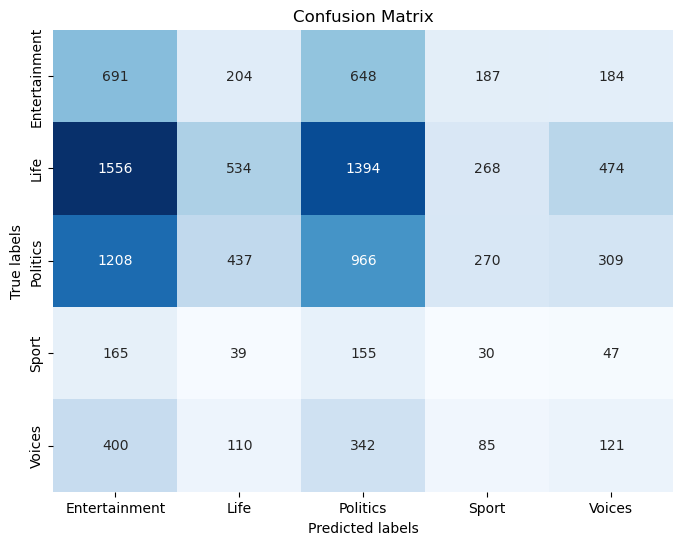

In [4]:
bidirLSTM.save_results(x_test, y_test)

In [11]:
bidirLSTM.save_model()